In [ ]:
# Distribution of BasePay

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Salaries.csv')  #data frame

In [7]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


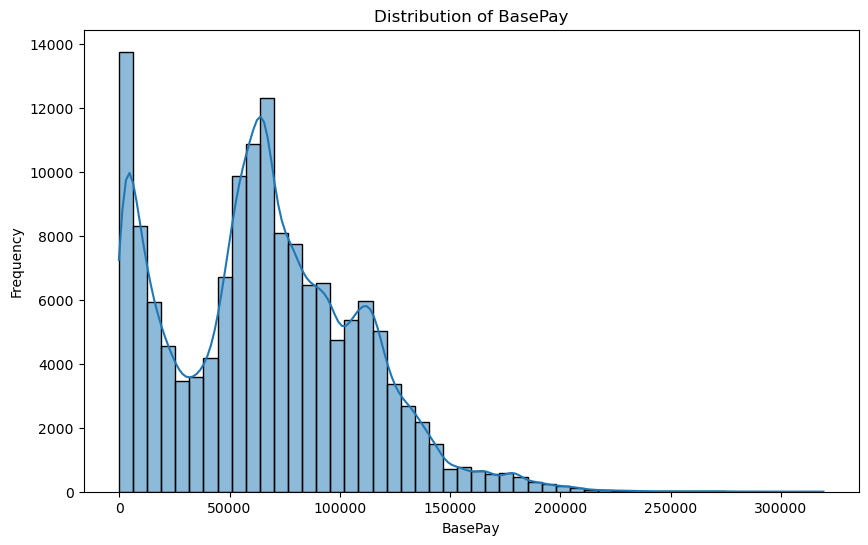

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BasePay'].dropna(), bins=50, kde=True)
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Average TotalPay per Year

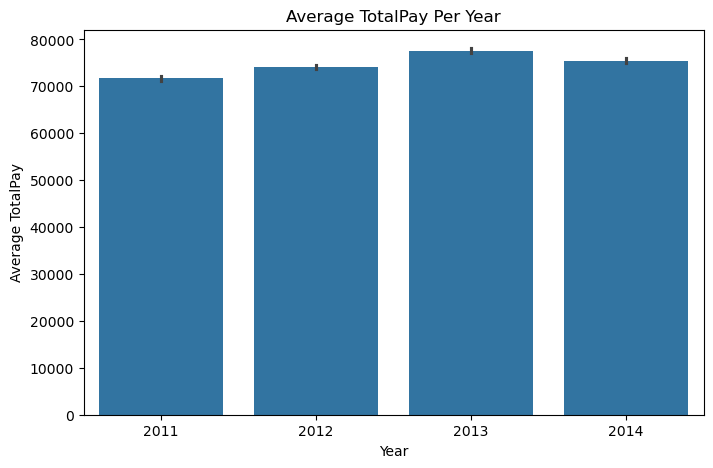

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='TotalPay', data=df, estimator='mean')
plt.title('Average TotalPay Per Year')
plt.ylabel('Average TotalPay')
plt.show()


In [ ]:
# Top 10 Most Common Job Titles

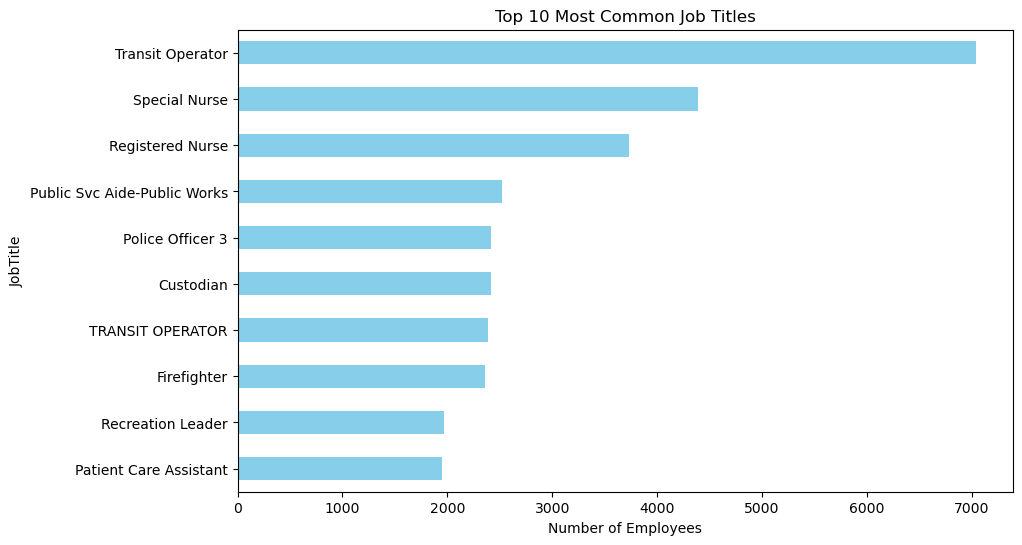

In [11]:
top_jobs = df['JobTitle'].value_counts().head(10)
top_jobs.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Top 10 Highest Paid Employees

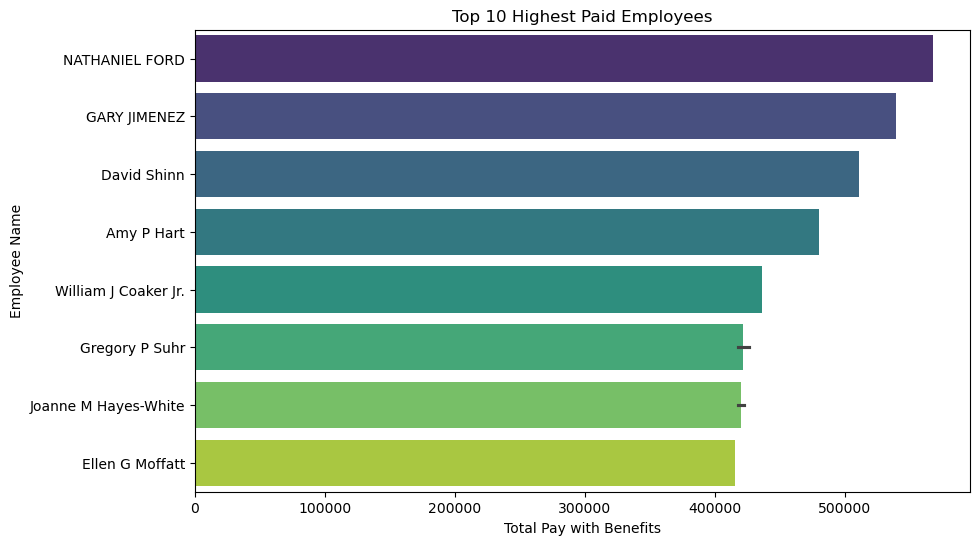

In [15]:
top_paid = df[['EmployeeName', 'TotalPayBenefits']].sort_values(by='TotalPayBenefits', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPayBenefits', hue='EmployeeName', y='EmployeeName', data=top_paid, palette='viridis')
plt.title('Top 10 Highest Paid Employees')
plt.xlabel('Total Pay with Benefits')
plt.ylabel('Employee Name')
plt.show()

In [ ]:
# Boxplot of BasePay by Year

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='BasePay', data=df)
plt.title('BasePay Distribution by Year')
plt.show()

In [ ]:
# Correlation Heatmap

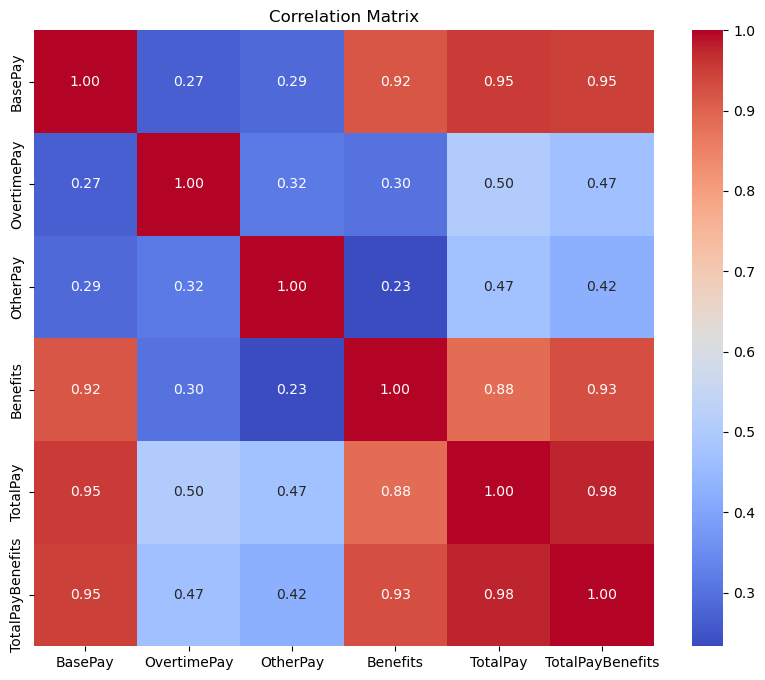

In [16]:
plt.figure(figsize=(10, 8))
corr = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Trend of Average OvertimePay Over Years

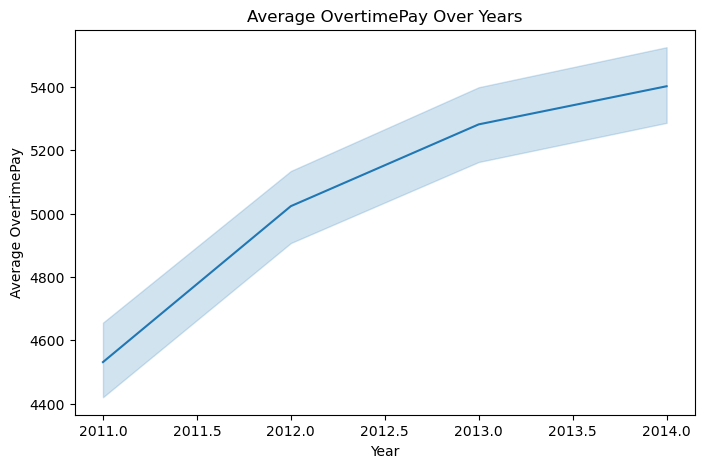

In [17]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='OvertimePay', data=df, estimator='mean')
plt.title('Average OvertimePay Over Years')
plt.ylabel('Average OvertimePay')
plt.show()

In [ ]:
#  Top 5 Agencies with Most Employees

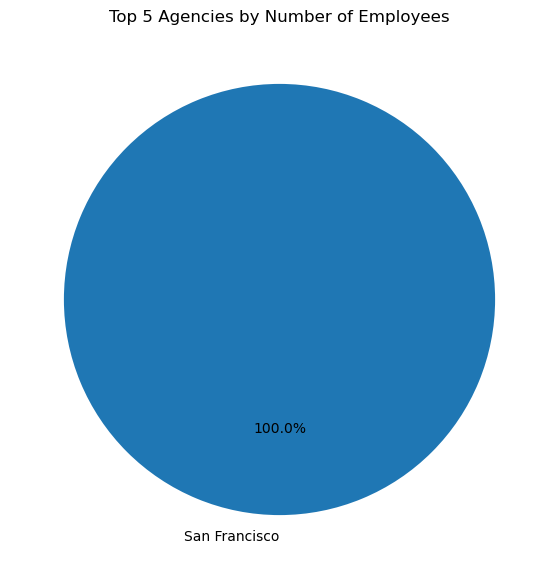

In [22]:
top_agencies = df['Agency'].value_counts().head(5)
top_agencies.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90)
plt.title('Top 5 Agencies by Number of Employees')
plt.ylabel('')
plt.show()


In [ ]:
# Compare TotalPay and TotalPayBenefits for Top 10 Job Titles

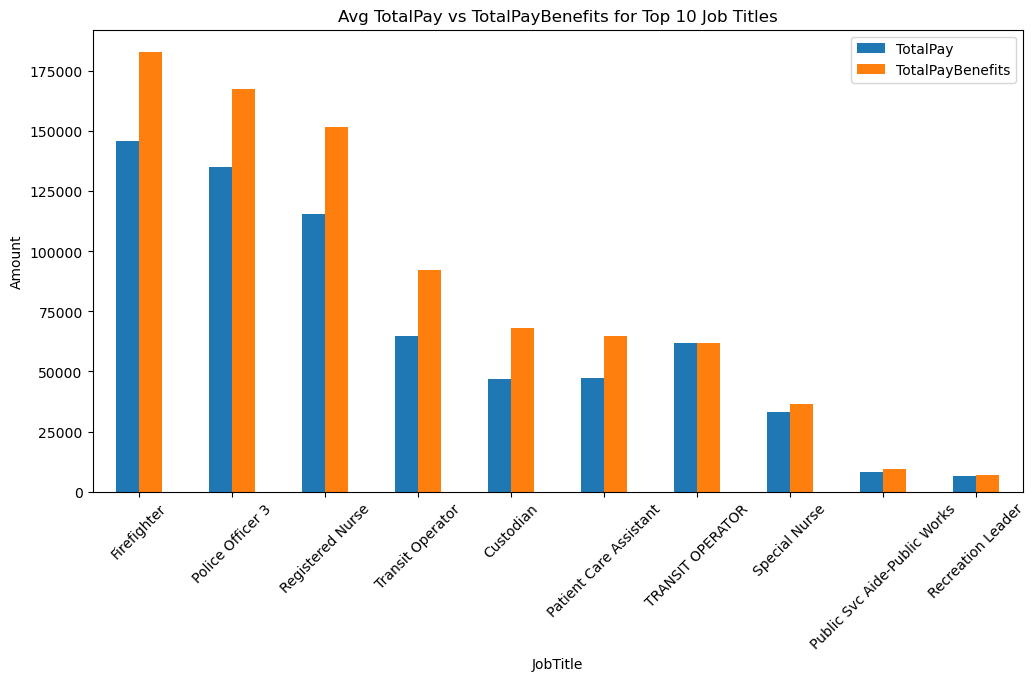

In [23]:
top_titles = df['JobTitle'].value_counts().head(10).index
filtered = df[df['JobTitle'].isin(top_titles)]
grouped = filtered.groupby('JobTitle')[['TotalPay', 'TotalPayBenefits']].mean().sort_values(by='TotalPayBenefits', ascending=False)

grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Avg TotalPay vs TotalPayBenefits for Top 10 Job Titles')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### Violin Plot of TotalPay by Year

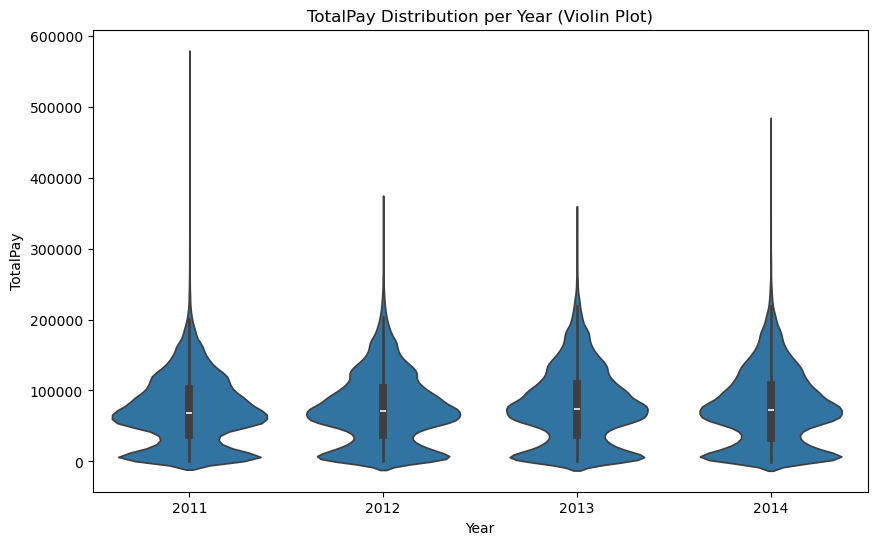

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='TotalPay', data=df)
plt.title('TotalPay Distribution per Year (Violin Plot)')
plt.show()

In [ ]:
# Create a Histogram of OvertimePay

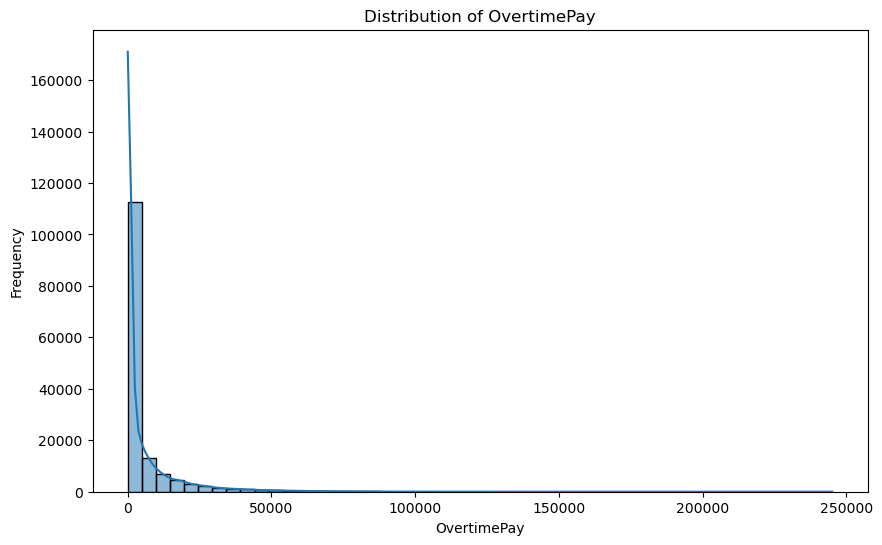

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OvertimePay'].dropna(), bins=50, kde=True)
plt.title('Distribution of OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Compare Average BasePay Across Years

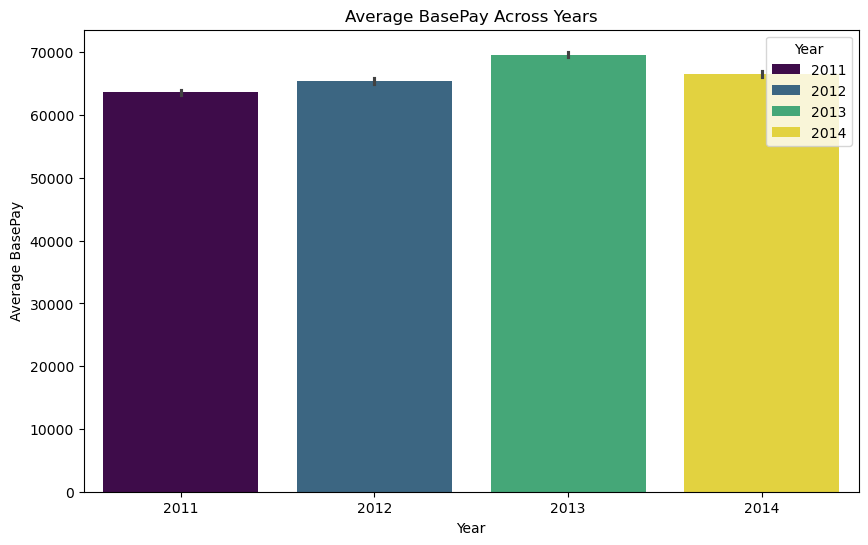

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year',hue='Year', y='BasePay', data=df, palette='viridis')
plt.title('Average BasePay Across Years')
plt.xlabel('Year')
plt.ylabel('Average BasePay')
plt.show()

In [ ]:
# Plot a Boxplot of TotalPay by Year

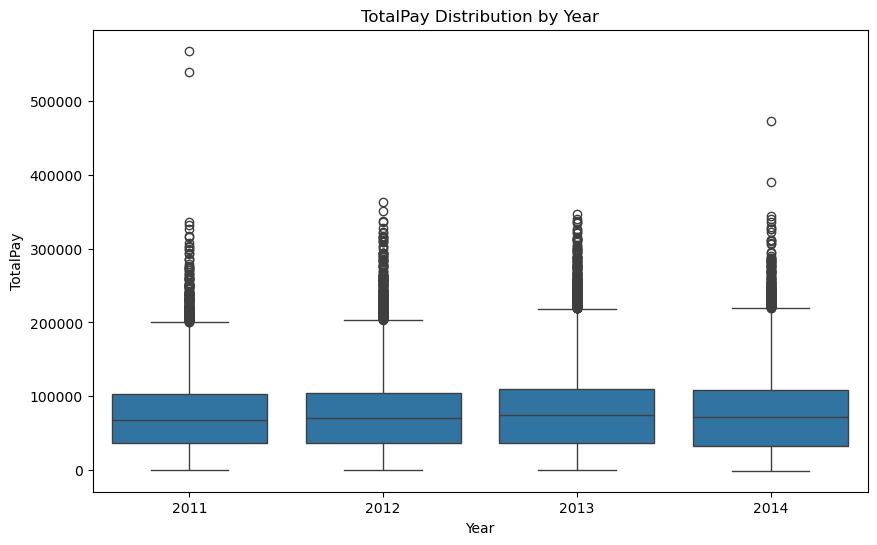

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='TotalPay', data=df)
plt.title('TotalPay Distribution by Year')
plt.show()

In [ ]:
# Job Title Frequency Barplot

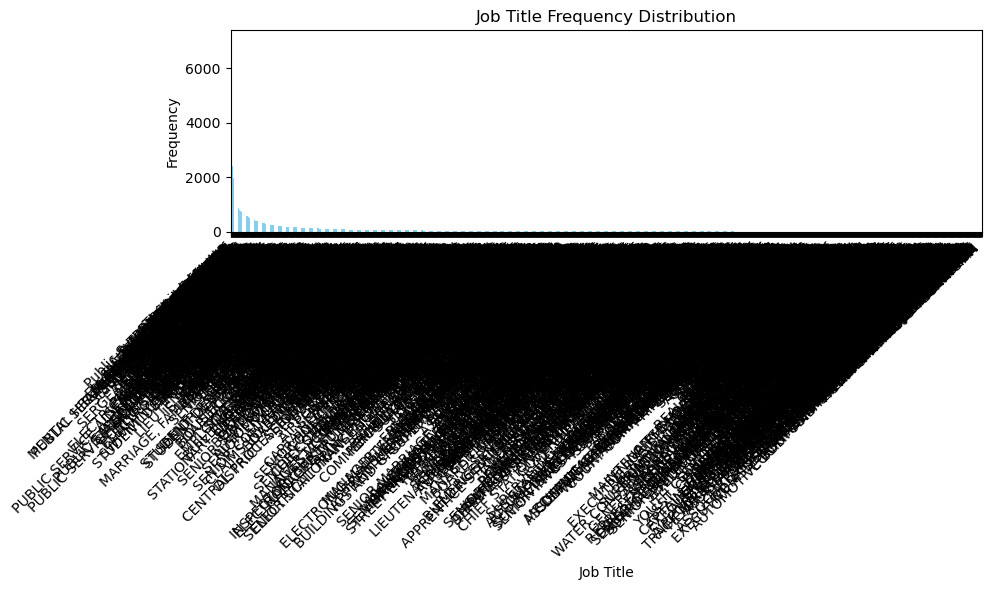

In [51]:
job_title_counts = df['JobTitle'].value_counts()
 
plt.figure(figsize=(10, 6))
job_title_counts.plot(kind='bar', color='skyblue')
plt.title('Job Title Frequency Distribution')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Heatmap for Numerical Columns

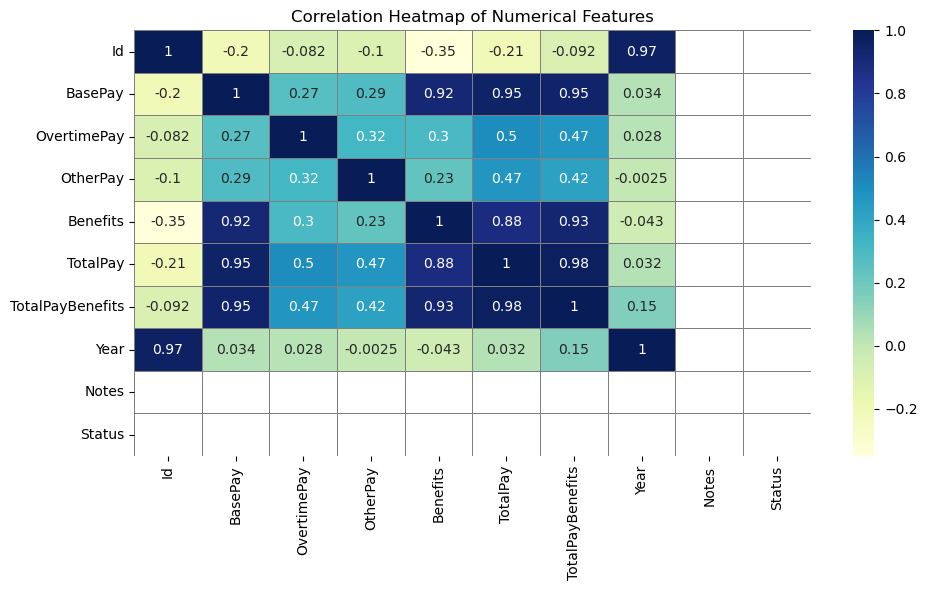

In [50]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
 
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# Median salary year wise

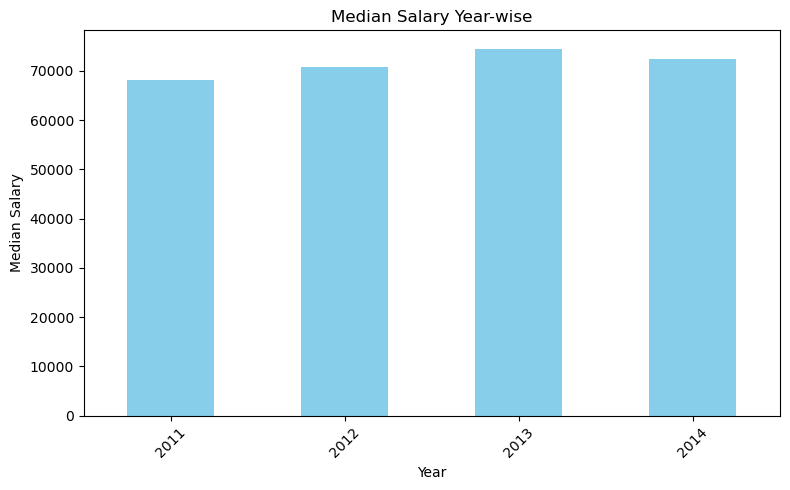

In [52]:
median_salary = df.groupby('Year')['TotalPay'].median()
plt.figure(figsize=(8, 5))
median_salary.plot(kind='bar', color='skyblue')
plt.title('Median Salary Year-wise')
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Come up with a way to categorise the salaries based on job titles and plot a salary distribution pie chart

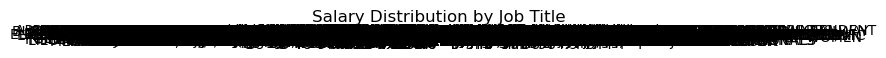

In [56]:
salary_by_jobtitle = df.groupby('JobTitle')['TotalPay'].sum()

plt.figure(figsize=(8, 8))
salary_by_jobtitle.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Salary Distribution by Job Title')
plt.ylabel('') 
plt.tight_layout()
plt.show()